### ALGORITMO REGRESSÃO LINEAR ANALÍTICA - EQUAÇÃO NORMAL

In [19]:
#importacoes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
%matplotlib inline

DADOS

In [34]:
df = pd.DataFrame({'Peso': np.array([40.0, 93.5, 35.5, 30.0, 52.0, 17.0, 38.5,  8.5, 33.0,  9.5, 21.0, 79.0]) / 2.205,
                            'Altura': np.array([42.8, 63.5, 37.5, 39.5, 45.5, 38.5, 43.0, 22.5, 37.0, 23.5, 33.0, 58.0]) / 39.37,
                            'Cateter': [37, 50, 34, 36, 43, 28, 37, 20, 34, 30, 38, 47]},
                            dtype='float')
y_df=df['Cateter']


PRÉ-PROCESSAMENTO (PADRONIZAÇÃO) - Standard score

In [21]:
df_norm = (df - df.mean()) / df.std()

TRANSFORMANDO O DATAFRAME EM NUMPY X,y

In [22]:
X = np.array(df_norm.drop('Cateter', axis=1))
y = df_norm.iloc[:, 2:3].values

CRIANDO X-zero com valores = 1

In [23]:
## criando uma função
def insert_ones(X):
    ones = np.ones([X.shape[0],1])
    return np.concatenate((ones,X) , axis=1)

INICIALIZANDO (adiciona x0 com valores = 1)

In [24]:
X = insert_ones(X)

DEFININDO w 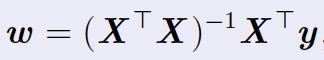

In [25]:
w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y) # normal equation
print(w)

[[3.81639165e-16]
 [6.08893878e-01]
 [3.07583303e-01]]


RECEBER NOVOS VALORES PARA TESTE

In [26]:
df_test = pd.read_csv('new_data.csv')

In [27]:
df_test

,Peso,Altura
0,7.71,0.978
1,17.46,1.092
2,40.00,1.500
3,3.50,0.550
4,20.00,1.400


REALIZAR PRÉ-PROCESSAMENTO USANDO A MÉDIA E DESVIO PADRÃO DO CONJ ORIGINAL

In [28]:
x_df = df[['Peso','Altura']]
df_test_norm = (df_test - x_df.mean()) / x_df.std()

In [29]:
df_test_norm

,Peso,Altura
0,-0.810679,-0.155373
1,0.014364,0.220659
2,1.921694,1.566460
3,-1.166928,-1.567144
4,0.229298,1.236607


In [31]:
X_new = np.array(df_test_norm)
X_new = insert_ones(X_new)
X_new

array([[ 1.        , -0.8106786 , -0.15537303],
       [ 1.        ,  0.01436426,  0.2206594 ],
       [ 1.        ,  1.92169409,  1.56645966],
       [ 1.        , -1.16692787, -1.56714389],
       [ 1.        ,  0.2292985 ,  1.23660666]])

CALCULANDO MODELO DE REGRESSÃO LINEAR ANALÍTICA

In [32]:
y_pred = X_new.dot(w)
y_pred

array([[-0.54140738],
       [ 0.07661745],
       [ 1.6519246 ],
       [-1.19256253],
       [ 0.51997801]])

DESPADRONIZAR O VALOR DA PREDIÇÃO OBTENDO O VALOR FINAL DA REGRESSÃO

In [63]:
Y_df = df['Cateter']

In [36]:
y_ok = y_pred*y_df.std()+y_df.mean()

In [37]:
y_ok

array([[31.73906676],
       [36.79324001],
       [49.67601555],
       [26.41395565],
       [40.41901835]])